<a href="https://colab.research.google.com/github/raisaurabh44/Stock_Price_Prediction/blob/main/Copy_of_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Stock_Price_Prediction/nifty_10yrs[1].csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2013-12-30 00:00:00+05:30,38.666786,38.695041,37.331744,37.614292,5612941,0.0,0.0,ADANIENT
1,2013-12-30 00:00:00+05:30,1593.923342,1593.923342,1553.678139,1564.609375,168075,0.0,0.0,HEROMOTOCO
2,2013-12-30 00:00:00+05:30,314.647645,314.740632,309.231520,311.253845,2113802,0.0,0.0,HDFCBANK
3,2013-12-30 00:00:00+05:30,248.808099,250.981959,243.887267,246.377319,1578700,0.0,0.0,HCLTECH
4,2013-12-30 00:00:00+05:30,397.459083,399.023178,392.174721,394.696289,241807,0.0,0.0,GRASIM
...,...,...,...,...,...,...,...,...,...
120837,2023-12-29 00:00:00+05:30,592.000000,592.000000,585.049988,587.250000,2223633,0.0,0.0,UPL
120838,2023-12-29 00:00:00+05:30,2823.899902,2863.300049,2802.850098,2848.949951,1507086,0.0,0.0,ADANIENT
120839,2023-12-29 00:00:00+05:30,6260.350098,6306.000000,6200.250000,6294.950195,245328,0.0,0.0,LTIM
120840,2023-12-29 00:00:00+05:30,5260.549805,5386.049805,5238.649902,5338.450195,535691,0.0,0.0,BRITANNIA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120842 entries, 0 to 120841
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Date     120842 non-null  datetime64[ns]
 1   Open     120842 non-null  float64       
 2   High     120842 non-null  float64       
 3   Low      120842 non-null  float64       
 4   Close    120842 non-null  float64       
 5   Volume   120842 non-null  int64         
 6   Company  120842 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 6.5+ MB


In [ ]:
df['Date']= pd.to_datetime(df['Date']).dt.date
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120842 entries, 0 to 120841
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          120842 non-null  datetime64[ns]
 1   Open          120842 non-null  float64       
 2   High          120842 non-null  float64       
 3   Low           120842 non-null  float64       
 4   Close         120842 non-null  float64       
 5   Volume        120842 non-null  int64         
 6   Dividends     120842 non-null  float64       
 7   Stock Splits  120842 non-null  float64       
 8   Company       120842 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 8.3+ MB


In [ ]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2013-12-30,38.666786,38.695041,37.331744,37.614292,5612941,0.0,0.0,ADANIENT
1,2013-12-30,1593.923342,1593.923342,1553.678139,1564.609375,168075,0.0,0.0,HEROMOTOCO
2,2013-12-30,314.647645,314.740632,309.231520,311.253845,2113802,0.0,0.0,HDFCBANK
3,2013-12-30,248.808099,250.981959,243.887267,246.377319,1578700,0.0,0.0,HCLTECH
4,2013-12-30,397.459083,399.023178,392.174721,394.696289,241807,0.0,0.0,GRASIM
...,...,...,...,...,...,...,...,...,...
120837,2023-12-29,592.000000,592.000000,585.049988,587.250000,2223633,0.0,0.0,UPL
120838,2023-12-29,2823.899902,2863.300049,2802.850098,2848.949951,1507086,0.0,0.0,ADANIENT
120839,2023-12-29,6260.350098,6306.000000,6200.250000,6294.950195,245328,0.0,0.0,LTIM
120840,2023-12-29,5260.549805,5386.049805,5238.649902,5338.450195,535691,0.0,0.0,BRITANNIA


We dont need divident and stock_split column

In [ ]:
df.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
df.head(20)

,Date,Open,High,Low,Close,Volume,Company
0,2013-12-30,38.666786,38.695041,37.331744,37.614292,5612941,ADANIENT
1,2013-12-30,1593.923342,1593.923342,1553.678139,1564.609375,168075,HEROMOTOCO
2,2013-12-30,314.647645,314.740632,309.231520,311.253845,2113802,HDFCBANK
3,2013-12-30,248.808099,250.981959,243.887267,246.377319,1578700,HCLTECH
4,2013-12-30,397.459083,399.023178,392.174721,394.696289,241807,GRASIM
5,2013-12-30,470.630666,474.296868,467.806882,468.258698,54320,EICHERMOT
6,2013-12-30,115.586455,118.117337,114.484791,117.045441,4375858,UPL
7,2013-12-30,2331.864873,2356.551409,2321.786696,2335.147217,209006,DRREDDY
8,2013-12-30,559.286290,563.806247,553.602137,555.725098,465808,DIVISLAB
9,2013-12-30,118.157316,121.601831,118.136445,120.975555,2221007,COALINDIA


In [ ]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
Company    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Company'].unique()

array(['ADANIENT', 'HEROMOTOCO', 'HDFCBANK', 'HCLTECH', 'GRASIM',
       'EICHERMOT', 'UPL', 'DRREDDY', 'DIVISLAB', 'COALINDIA', 'CIPLA',
       'BRITANNIA', 'BPCL', 'BHARTIARTL', 'WIPRO', 'BAJFINANCE',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'AXISBANK', 'ASIANPAINT', 'HINDALCO',
       'ULTRACEMCO', 'HINDUNILVR', 'ICICIBANK', 'TATASTEEL', 'TATAMOTORS',
       'TATACONSUM', 'SUNPHARMA', 'SBIN', 'RELIANCE', 'TECHM',
       'POWERGRID', 'ONGC', 'APOLLOHOSP', 'NTPC', 'M&M', 'MARUTI',
       'TITAN', 'LT', 'KOTAKBANK', 'JSWSTEEL', 'ITC', 'INFY',
       'INDUSINDBK', 'NESTLEIND', 'ADANIPORTS', 'TCS', 'LTIM', 'SBILIFE',
       'HDFCLIFE'], dtype=object)

Our Idea is to create a linear model according to user input


Creating a dateframe with all the unique stocks list

In [ ]:
col=['ADANIENT', 'HEROMOTOCO', 'HDFCBANK', 'HCLTECH', 'GRASIM',
       'EICHERMOT', 'UPL', 'DRREDDY', 'DIVISLAB', 'COALINDIA', 'CIPLA',
       'BRITANNIA', 'BPCL', 'BHARTIARTL', 'WIPRO', 'BAJFINANCE',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'AXISBANK', 'ASIANPAINT', 'HINDALCO',
       'ULTRACEMCO', 'HINDUNILVR', 'ICICIBANK', 'TATASTEEL', 'TATAMOTORS',
       'TATACONSUM', 'SUNPHARMA', 'SBIN', 'RELIANCE', 'TECHM',
       'POWERGRID', 'ONGC', 'APOLLOHOSP', 'NTPC', 'M&M', 'MARUTI',
       'TITAN', 'LT', 'KOTAKBANK', 'JSWSTEEL', 'ITC', 'INFY',
       'INDUSINDBK', 'NESTLEIND', 'ADANIPORTS', 'TCS', 'LTIM', 'SBILIFE',
       'HDFCLIFE']

print(col)
new_df = pd.DataFrame(col, columns=['Stock_Name'], index=range(1, len(col)+1))
new_df

['ADANIENT', 'HEROMOTOCO', 'HDFCBANK', 'HCLTECH', 'GRASIM', 'EICHERMOT', 'UPL', 'DRREDDY', 'DIVISLAB', 'COALINDIA', 'CIPLA', 'BRITANNIA', 'BPCL', 'BHARTIARTL', 'WIPRO', 'BAJFINANCE', 'BAJAJ-AUTO', 'BAJAJFINSV', 'AXISBANK', 'ASIANPAINT', 'HINDALCO', 'ULTRACEMCO', 'HINDUNILVR', 'ICICIBANK', 'TATASTEEL', 'TATAMOTORS', 'TATACONSUM', 'SUNPHARMA', 'SBIN', 'RELIANCE', 'TECHM', 'POWERGRID', 'ONGC', 'APOLLOHOSP', 'NTPC', 'M&M', 'MARUTI', 'TITAN', 'LT', 'KOTAKBANK', 'JSWSTEEL', 'ITC', 'INFY', 'INDUSINDBK', 'NESTLEIND', 'ADANIPORTS', 'TCS', 'LTIM', 'SBILIFE', 'HDFCLIFE']


,Stock_Name
1,ADANIENT
2,HEROMOTOCO
3,HDFCBANK
4,HCLTECH
5,GRASIM
6,EICHERMOT
7,UPL
8,DRREDDY
9,DIVISLAB
10,COALINDIA


Asking the user to input the values

In [ ]:
result=None
while True:
    n = input('Enter the stock Index_Number from (1-50) for which you want to predict: ')
    if n.isdigit():
        index_num = int(n)
        if 1 <= index_num <= 50:
            stock_symbol = new_df.iloc[index_num - 1]['Stock_Name']
            print(f'The stock symbol for index {index_num} is: {stock_symbol}')
            result=stock_symbol
            break
        else:
            print('Enter a valid number within the range (1-50).')
    else:
        print('Enter a valid numerical value. Please try again.')

Enter the stock Index_Number from (1-50) for which you want to predict: 5
The stock symbol for index 5 is: GRASIM


In [ ]:
result

'GRASIM'

In [ ]:
sample_df = df[df['Company'] == result]
sample_df

,Date,Open,High,Low,Close,Volume,Company
4,2013-12-30,397.459083,399.023178,392.174721,394.696289,241807,GRASIM
62,2013-12-31,395.595303,401.632456,395.595303,396.815887,223578,GRASIM
96,2014-01-01,397.619898,398.189976,393.965429,396.808594,121749,GRASIM
156,2014-01-02,396.881690,400.528845,383.864509,386.386078,235830,GRASIM
188,2014-01-03,383.864496,386.334922,380.400053,384.551544,218033,GRASIM
...,...,...,...,...,...,...,...
120592,2023-12-22,2089.000000,2096.600098,2034.900024,2046.199951,1002033,GRASIM
120652,2023-12-26,2051.000000,2083.000000,2049.000000,2069.550049,641259,GRASIM
120714,2023-12-27,2078.949951,2130.850098,2071.600098,2124.800049,1133407,GRASIM
120761,2023-12-28,2129.000000,2148.250000,2106.300049,2139.949951,1059776,GRASIM


In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 4 to 120831
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2467 non-null   datetime64[ns]
 1   Open     2467 non-null   float64       
 2   High     2467 non-null   float64       
 3   Low      2467 non-null   float64       
 4   Close    2467 non-null   float64       
 5   Volume   2467 non-null   int64         
 6   Company  2467 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 154.2+ KB


In [ ]:
sample_df.drop(['Company'], axis=1, inplace=True)
sample_df

<ipython-input-17-ecedf30b7a34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df.drop(['Company'], axis=1, inplace=True)


,Date,Open,High,Low,Close,Volume
4,2013-12-30,397.459083,399.023178,392.174721,394.696289,241807
62,2013-12-31,395.595303,401.632456,395.595303,396.815887,223578
96,2014-01-01,397.619898,398.189976,393.965429,396.808594,121749
156,2014-01-02,396.881690,400.528845,383.864509,386.386078,235830
188,2014-01-03,383.864496,386.334922,380.400053,384.551544,218033
...,...,...,...,...,...,...
120592,2023-12-22,2089.000000,2096.600098,2034.900024,2046.199951,1002033
120652,2023-12-26,2051.000000,2083.000000,2049.000000,2069.550049,641259
120714,2023-12-27,2078.949951,2130.850098,2071.600098,2124.800049,1133407
120761,2023-12-28,2129.000000,2148.250000,2106.300049,2139.949951,1059776


Now Eda for new sub data frame

In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 4 to 120831
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2467 non-null   datetime64[ns]
 1   Open    2467 non-null   float64       
 2   High    2467 non-null   float64       
 3   Low     2467 non-null   float64       
 4   Close   2467 non-null   float64       
 5   Volume  2467 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 134.9 KB


In [ ]:
(sample_df.isnull().sum()/(len(sample_df)))*100

Date      0.0
Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
dtype: float64

In [ ]:
sample_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2467.0,9.875923e+02,4.649499e+02,357.311159,586.527941,824.761496,1.407465e+03,2.140300e+03
High,2467.0,1.000287e+03,4.696684e+02,362.807502,593.223298,834.972624,1.435192e+03,2.148250e+03
Low,2467.0,9.746049e+02,4.601341e+02,354.679976,571.572137,811.363806,1.394149e+03,2.115000e+03
Close,2467.0,9.873166e+02,4.650009e+02,355.359711,586.126709,823.678772,1.416452e+03,2.139950e+03
Volume,2467.0,1.174178e+06,1.327708e+06,0.000000,472286.000000,821228.000000,1.438000e+06,3.273880e+07


Now doing Visulization
1. Histogram plot and box plot along with skewness value

In [ ]:
num_col=sample_df.select_dtypes(include=np.number).columns.tolist()
num_col

['Open', 'High', 'Low', 'Close', 'Volume']

Skew : 0.64


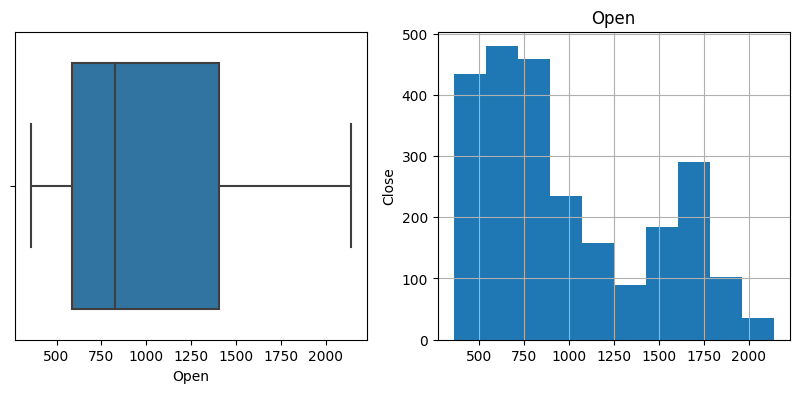

Skew : 0.64


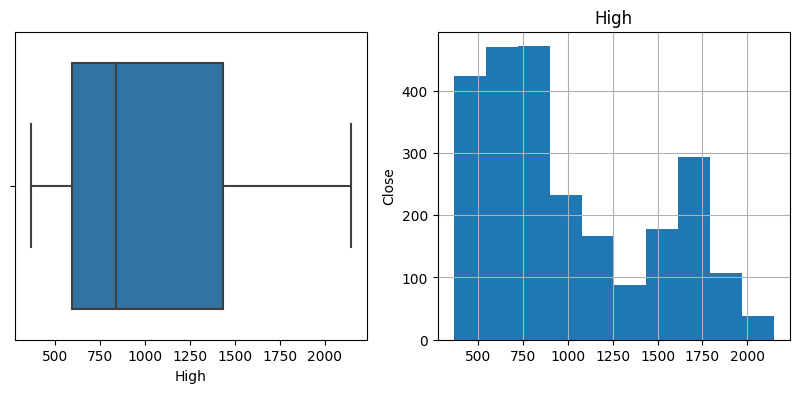

Skew : 0.65


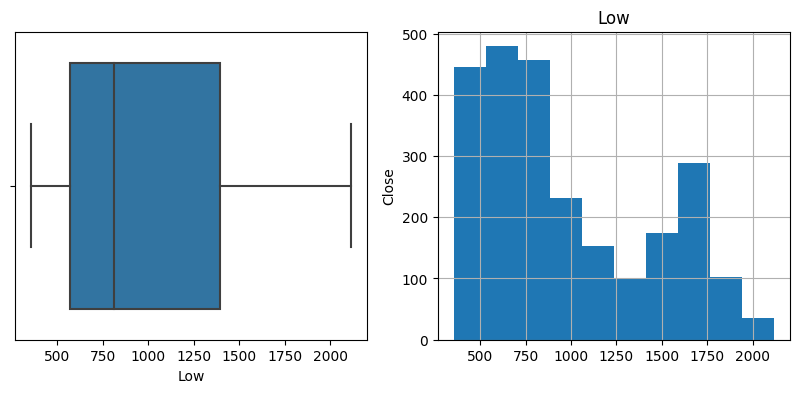

Skew : 0.65


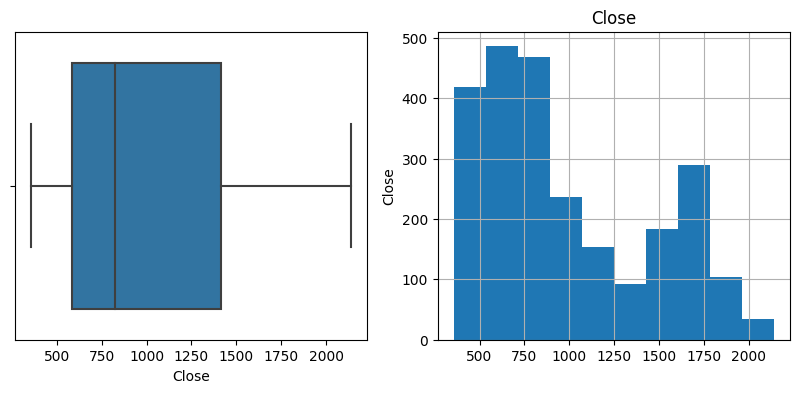

Skew : 8.18


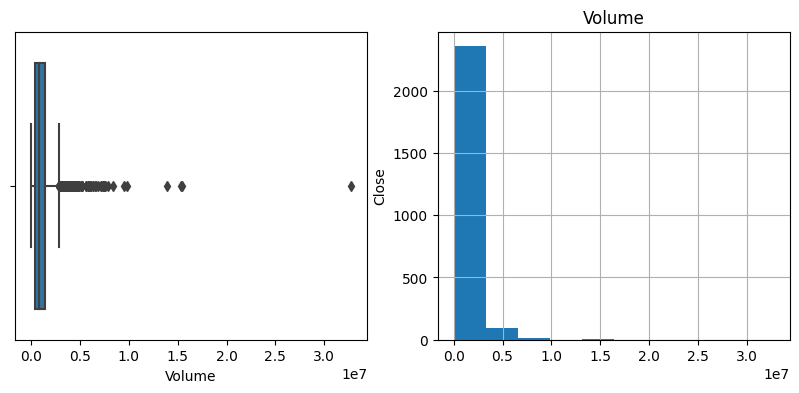

In [ ]:
for col in num_col:
    print('Skew :', round(sample_df[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 2)
    sample_df[col].hist(grid=True)
    plt.ylabel('Close')
    plt.title(col)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=sample_df[col])
    plt.show()

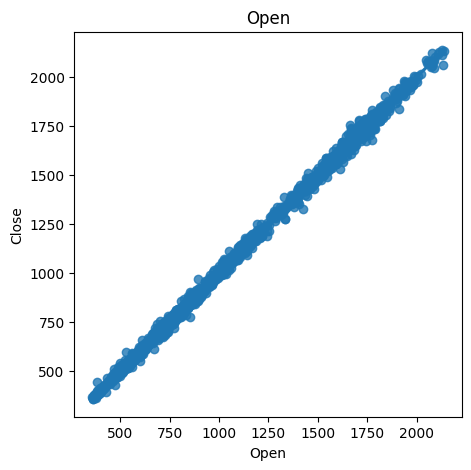

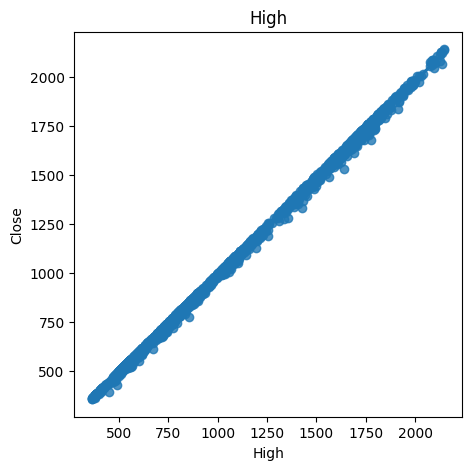

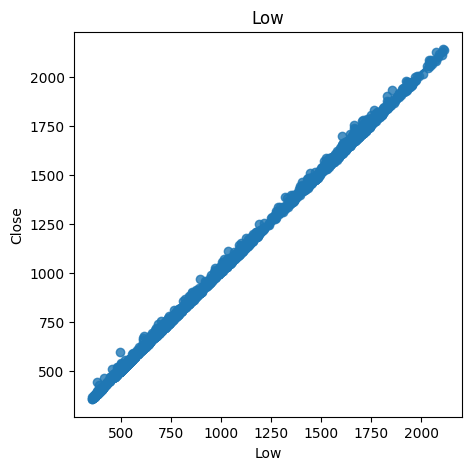

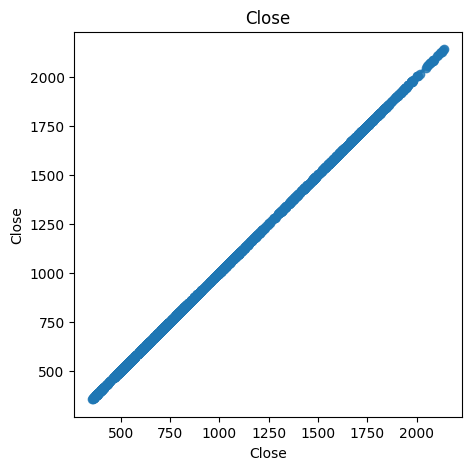

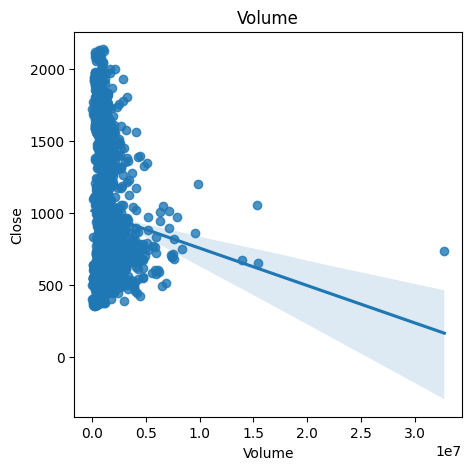

In [ ]:
for col in num_col:
  plt.figure(figsize=(5,5))
  sns.regplot(x=col, y="Close", data=sample_df)
  plt.ylabel('Close')
  plt.title(col)
  plt.show()

**Different Visualization In EDA**

1.Histograms:

Visualize the distribution of a single variable.

plt.figure(figsize=(10,10))
plt.hist(data['variable'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Variable')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

2.Box Plots:

Show the distribution of a variable, including measures like median, quartiles, and potential **outliers**.

plt.figure(figsize=(10,10))
sns.boxplot(x='grouping_variable', y='variable', data=df)
plt.title('Box Plot of Variable by Group')
plt.show()

3.Pair Plots:

Display scatter plots for all combinations of numerical variables in a dataset.

plt.figure(figsize=(10,10))
sns.pairplot(df, hue='categorical_variable')
plt.show()

4.**Correlation Heatmap**:

Visualize the correlation between numerical variables.

plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm,rainbow,plasma')
plt.title('Correlation Heatmap')
plt.show()

5.Violin Plots:

Combine aspects of box plots and kernel density plots for better distribution visualization.

plt.figure(figsize=(10,10))
sns.violinplot(x='grouping_variable', y='variable', data=df)
plt.title('Violin Plot of Variable by Group')
plt.show()

6.Count Plots:

Display the count of observations in each category of a categorical variable.

plt.figure(figsize=(10,10))
sns.countplot(x='categorical_variable', data=df)
plt.title('Count Plot of Categorical Variable')
plt.show()

7.Scatter Plots:

Show the relationship between two numerical variables.

plt.figure(figsize=(10,10))
plt.scatter(x='variable1', y='variable2', data=df)
plt.title('Scatter Plot between Variable1 and Variable2')
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.show()

8.Strip Plots and Swarm Plots:

Visualize the distribution of a variable for different categories.

plt.figure(figsize=(10,10))
sns.stripplot(x='categorical_variable', y='numerical_variable', data=df, jitter=True)
plt.title('Strip Plot of Numerical Variable by Category')
plt.show()

9.Pie Charts:

Display the proportion of each category in a categorical variable.

plt.figure(figsize=(10,10))
plt.pie(df['categorical_variable'].value_counts(), labels=df['categorical_variable'].unique(), autopct='%1.1f%%')
plt.title('Pie Chart of Categorical Variable')
plt.show()

10.Heatmap for Categorical Variables:

Visualize the relationships between two categorical variables.

plt.figure(figsize=(10,10))
pd.crosstab(df['categorical_variable1'], df['categorical_variable2'], margins=True).style.background_gradient(cmap='coolwarm')